In [2]:
import numpy as np
import tensorflow as tf
import collections
import os
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
def _read_words(filename):
    with tf.gfile.GFile(filename, "r") as f:
        return f.read().replace('\n', "<eos>").split()
    
def _read_sentences(filename):
    """
    Returns list of lists of words
    """
    with tf.gfile.GFile(filename, "r") as f:
        return [sentence.split() for sentence in f.read().split('\n')]

def _build_vocab(filename):
    data = _read_words(filename)

    counter = collections.Counter(data)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))

    return word_to_id

def _file_to_word_ids(filename, word_to_id):
    """
    This is a remnant of an experiment where I tried to 
    Returns list of lists of integers (that encode words)
    """
    data = _read_sentences(filename)
    return [[word_to_id[word] for word in sentence if word in word_to_id] for sentence in data] # I'm sorry


def ptb_raw_data(data_path=None):
    """Load PTB raw data from data directory "data_path".

    Reads PTB text files, converts strings to integer ids,
    and performs mini-batching of the inputs.

    The PTB dataset comes from Tomas Mikolov's webpage:

    http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz

    Args:
        data_path: string path to the directory where simple-examples.tgz has
        been extracted.

    Returns:
        tuple (train_data, valid_data, test_data, vocabulary)
        where each of the data objects can be passed to PTBIterator.
    """

    train_path = os.path.join(data_path, "ptb.train.txt")
    valid_path = os.path.join(data_path, "ptb.valid.txt")
    test_path = os.path.join(data_path, "ptb.test.txt")

    word_to_id = _build_vocab(train_path)
    train_data = _file_to_word_ids(train_path, word_to_id)
    valid_data = _file_to_word_ids(valid_path, word_to_id)
    test_data  = _file_to_word_ids(test_path, word_to_id)
    vocabulary = len(word_to_id)
    return train_data, valid_data, test_data, vocabulary

train_data, valid_data, test_data, vocab = ptb_raw_data("/Users/thomasklein/Uni/Bachelorarbeit/ptbtext")

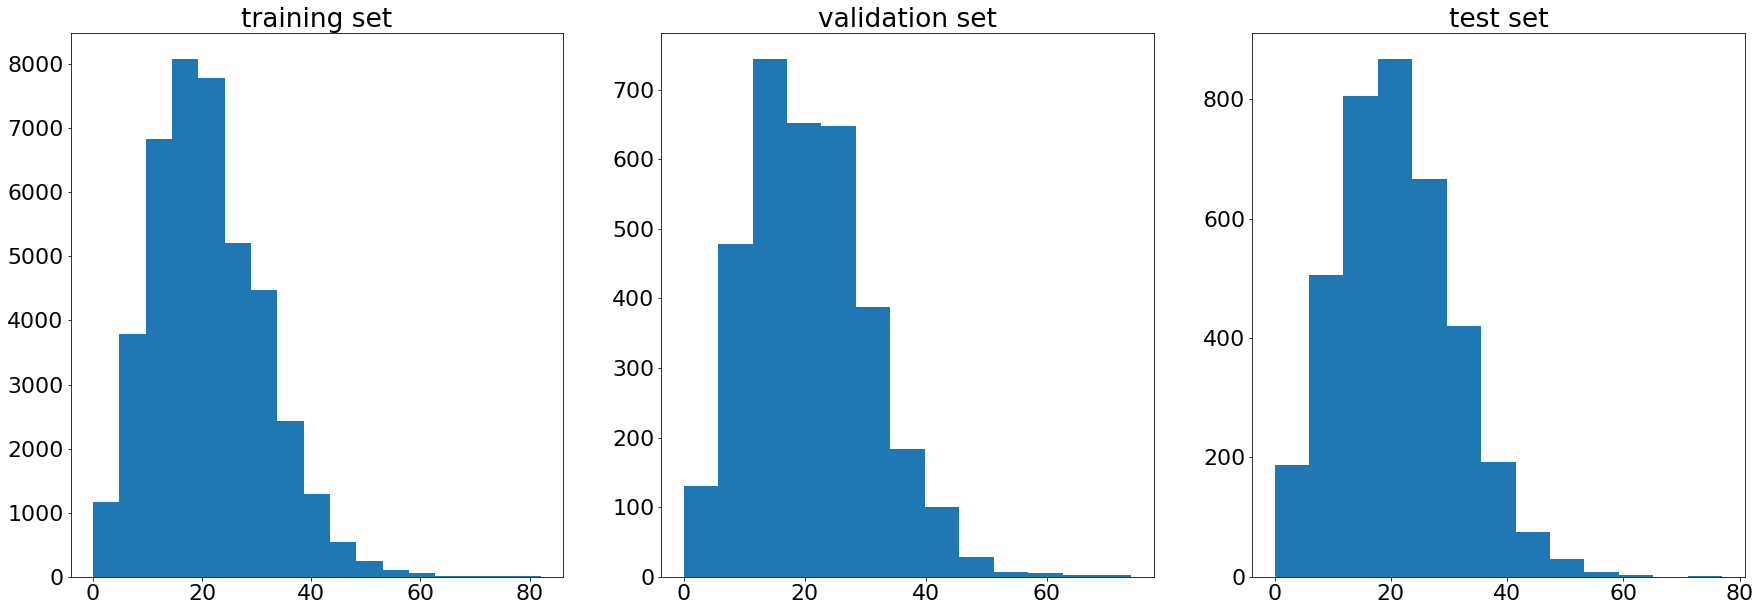

In [16]:

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})

plt.subplot(1,3,1)
lengths = [len(sentence) for sentence in train_data]
plt.title("training set")
plt.hist(lengths, 'sturges')

plt.subplot(1,3,2)
lengths = [len(sentence) for sentence in valid_data]
plt.title("validation set")
plt.hist(lengths, 'sturges')

plt.subplot(1,3,3)
lengths = [len(sentence) for sentence in test_data]
plt.title("test set")
plt.hist(lengths, 'sturges')
plt.savefig('ptb_analysis.png')
plt.show()

In [59]:
word_to_id = _build_vocab("/Users/thomasklein/Uni/Bachelorarbeit/ptbtext/ptb.train.txt")
words_of_interest = ['the', '<unk>', 'of']
frequency = dict()
for word in words_of_interest:
    frequency[word] = word_to_id[word]
print(frequency)

{'the': 0, '<unk>': 1, 'of': 4}


In [65]:
lis = ['the', 'meaning', 'of', 'life', 'is', '<unk>', 'the', '<unk>', 'of', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>', 'the', '<unk>', '<unk>']
second_sentence = ['the', 'meaning', 'of', 'life', 'is', 'a', 'the', 'of', 'the', 'world', "'s", 'the', 'world', "'s", 'largest', 'the', 'most', 'of', 'the', 'world', "'s", 'the', 'world', "'s", 'largest', 'the', 'world', "'s", 'largest', 'the', 'world', "'s", 'largest', 'the', 'world', "'s", 'largest', 'the', 'largest', 'market', 'the', 'market', 'the', 'market', 'is', 'the', 'most', 'of', 'the', 'most', 'of', 'the', 'most', 'of', 'the']
simple = ['the', 'meaning', 'of', 'life', 'is', 'the', 'first', 'of', 'the', 'most', 'important', 'of', 'the', 'world', "'s", 'most', 'of', 'the', 'most', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important', 'of', 'the', 'most', 'important']
fw_no_dropout = ['the', 'meaning', 'of', 'life', 'is', 'placed', 'on', 'the', 'money', 'in', 'equities', 'at', 'the', 'market', "'s", 'ethical', '<unk>', 'the', 'market', "'s", 'ethical', '<unk>', 'the', 'market', 'is', "n't", 'affected', 'the', 'market', 'research', 'firm', 'the', 'attention','the', 'market', 'the', 'market', "'s", 'market', 'research', 'firm', 'not', 'the', 'firm', 'the', 'firm', 'the', 'firm', 'the', 'firm', 'the', 'firm', "'s", 'the', 'firm']
print(" ".join(fw_no_dropout))

the meaning of life is placed on the money in equities at the market 's ethical <unk> the market 's ethical <unk> the market is n't affected the market research firm the attention the market the market 's market research firm not the firm the firm the firm the firm the firm 's the firm
